<a href="https://colab.research.google.com/github/senasung37/startup_project/blob/main/%EA%B8%B0%EC%97%85%ED%98%91%EC%97%85_NLP_clustering(%EB%B3%B4%EC%95%88%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연습 - 문장 클러스터링(예제코드)


출처: http://ai.intelligentonlinetools.com/ml/text-clustering-word-embedding-machine-learning/

In [ ]:
#라이브러리
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics

In [ ]:
#문장 지정
  
sentences = [['this', 'is', 'the', 'one','good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['weather', 'rain', 'snow'],
            ['yesterday', 'weather', 'snow'],
            ['forecast', 'tomorrow', 'rain', 'snow'],
            ['this', 'is', 'the', 'new', 'post'],
            ['this', 'is', 'about', 'more', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']]

In [ ]:
#W2V 모델 정의
model = Word2Vec(sentences, min_count=1) 

In [ ]:
#문장 벡터라이징 함수
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [ ]:
#문장 벡터라이징
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))   
 
print ("========================")
print (X[:1])

[array([-1.71449711e-03,  1.80841773e-04,  1.13617815e-03,  7.63929100e-04,
        1.21060305e-03, -9.56489879e-04,  6.98616845e-04,  1.88184640e-04,
        1.03972526e-03,  1.05903752e-03,  6.63258776e-04, -5.04950876e-05,
       -9.62907943e-05,  4.36705450e-05, -9.55566356e-04, -4.95635322e-04,
       -5.06073528e-04,  1.98457041e-03, -1.54185551e-03,  3.56847653e-04,
       -2.85365677e-04, -2.49756267e-04, -7.27393548e-04, -1.82820589e-03,
       -6.90047920e-04, -2.22838670e-03,  8.82053515e-04, -1.14997278e-03,
        1.03867357e-03, -5.59681284e-05,  1.31302816e-03, -7.39938347e-04,
        3.36365658e-04, -1.58022565e-03,  1.97277710e-04, -1.86555146e-04,
       -4.29884734e-04, -1.84624037e-03,  4.67350881e-04,  8.16797488e-04,
       -5.04666357e-04, -1.15899451e-03, -5.24852134e-04, -4.33238107e-04,
       -8.14448635e-04,  1.95869012e-04, -1.27887688e-04, -3.85744468e-04,
        6.46782806e-04, -6.98396936e-04, -9.51066249e-05,  3.00068088e-04,
        3.93253984e-04, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#학습된 단어들 
model[model.wv.vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-4.9400455e-03, -2.0696244e-03, -3.5341349e-03, ...,
        -1.7612353e-04, -4.9399710e-03,  4.6905293e-03],
       [ 2.0826842e-04, -1.9352066e-03,  4.5244200e-03, ...,
         3.7255071e-03, -2.7765275e-03,  3.4952599e-03],
       [-1.0411508e-04,  2.0852324e-03, -1.6639740e-03, ...,
         1.0148311e-04, -3.1362134e-03,  1.3670798e-03],
       ...,
       [-3.6425616e-03, -4.7247726e-03, -2.9592051e-03, ...,
         1.4746583e-03,  6.5297075e-04, -3.5719033e-03],
       [-4.5596724e-03,  1.1867620e-04,  2.2691085e-04, ...,
        -4.5145252e-03,  2.2664904e-03, -2.0495283e-03],
       [-5.2015885e-04,  4.2869141e-03,  7.7297882e-05, ...,
        -3.9826334e-03, -2.8687224e-03,  3.9444263e-03]], dtype=float32)

In [ ]:
#단어간 유사도 평가(코싸인 유사도)
print (model.similarity('this', 'more'))


-0.0009720714


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


In [ ]:
#유사한 단어 불러오기(the top-N most similar words)
print(model.most_similar(positive=['machine'], negative=[], topn=5))

[('this', 0.07980456203222275), ('another', 0.03856130689382553), ('forecast', 0.030820723623037338), ('about', 0.02974899858236313), ('one', 0.027424011379480362)]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
#클러스터링
NUM_CLUSTERS = 2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)   
  
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))    
     
     
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

[0, 0, 1, 1, 1, 1, 0, 0, 0]
0:['this', 'is', 'the', 'one', 'good', 'machine', 'learning', 'book']
0:['this', 'is', 'another', 'book']
1:['one', 'more', 'book']
1:['weather', 'rain', 'snow']
1:['yesterday', 'weather', 'snow']
1:['forecast', 'tomorrow', 'rain', 'snow']
0:['this', 'is', 'the', 'new', 'post']
0:['this', 'is', 'about', 'more', 'machine', 'learning', 'post']
0:['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']


KMeans(n_clusters=2)

In [ ]:
#클러스터링 결과
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("-----------")
print ("Centroids data")
print (centroids)
print ("-----------")  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Cluster id labels for inputted data
[1 1 1 0 0 0 1 1 1]
-----------
Centroids data
[[ 3.23950449e-04 -9.14007736e-04  9.68128579e-04  4.58218701e-04
  -7.73428551e-04  1.77843787e-04 -9.15176099e-04 -1.78248195e-03
  -7.32561754e-04 -2.43101638e-03 -4.03089158e-04  1.06729412e-03
  -1.36130909e-03  8.21379285e-04 -9.04728309e-04 -1.03955171e-03
   9.01471173e-04 -4.04134024e-04  1.53901733e-03  1.09919613e-03
   2.98512537e-04  1.64742632e-03 -2.05981208e-03 -7.70296586e-05
   1.06155522e-03  1.04290453e-03  5.15791277e-04 -9.33207169e-06
  -1.12573946e-03 -1.75702366e-03 -6.65363861e-04 -2.11138212e-03
   2.50534200e-04  9.89086945e-04 -1.14994294e-03  1.85876002e-03
   1.70799647e-03  1.05132790e-03 -1.18487014e-03 -1.01979883e-03
  -1.71473479e-03 -3.27058136e-03 -4.01940963e-04 -1.71366136e-03
  -6.16218487e-04  1.17583356e-03 -5.17875781e-04  2.77647277e-04
   2.28221509e-04 -1.44637869e-03  1.02228349e-03 -8.90493112e-04
  -1.73306602e-04  2.34209548e-03  1.42353439e-03 -1.573317

In [ ]:
#실루엣 점수 평가(클러스터링 평가: -1~1)
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
print ("Silhouette_score: ")
print (silhouette_score) 

Silhouette_score: 
0.289187


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0 ['this', 'is', 'the', 'one', 'good', 'machine', 'learning', 'book']
0 ['this', 'is', 'another', 'book']
1 ['one', 'more', 'book']
1 ['weather', 'rain', 'snow']
1 ['yesterday', 'weather', 'snow']
1 ['forecast', 'tomorrow', 'rain', 'snow']
0 ['this', 'is', 'the', 'new', 'post']
0 ['this', 'is', 'about', 'more', 'machine', 'learning', 'post']
0 ['and', 'this', 'is', 'the', 'one', 'last', 'post', 'book']


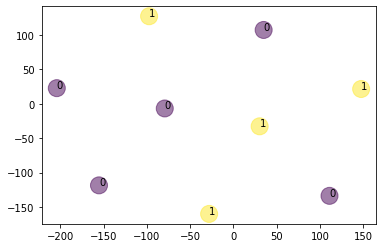

In [ ]:
#클러스터링 시각화
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
  
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
  
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  sentences[j]))
 
plt.show()

#프로젝트 - 페이워크 데이터에 적용

In [ ]:
#라이브러리
import pandas as pd
import requests
import numpy as np

#nlp 라이브러리
import re
import nltk
import spacy
from spacy.tokenizer import Tokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

#w2v, kmeans 라이브러리
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer  
from sklearn import cluster
from sklearn import metrics

In [ ]:
# 견적서 파일 df로 불러오기
df = pd.read_excel('견적서_변형.xlsx')
df.head(3)

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류,메모,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업,NaN,NaN,NaN,NaN
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업,NaN,NaN,NaN,NaN
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드,NaN,NaN,NaN,NaN


In [ ]:
df = df.iloc[:, :10]
df.head(3)

,유저명,사업자 여부,클라이언트,총 금액,항목명,규격,수량,단가,분류,세부분류
0,Lee Jeong,1,김민찬,1500000.0,영문기사 작성,NaN,1,1000000,비즈니스,문서작업
1,이정훈,0,클래스랩,1125000.0,신문사 기사 발행,NaN,5,150000,비즈니스,문서작업
2,siren,1,이운형,8250000.0,김치찌개 팩,구수한맛50g*2ea,1000,2500,건강/미용,푸드


In [ ]:
#테스트 행 삭제
df = df[df["분류"].str.contains('테스트') == False]

In [ ]:
#함수-특수기호, 공백제거
def clean_text(texts):
  #remove punctuation 
  new_text = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts))

  #remove number
  new_text = re.sub(r'\d+','', str(new_text))
  #remove extra space
  new_text = re.sub(r'\s+', ' ',new_text) 
  #remove spaces
  new_text = re.sub(r'\s+', ' ', new_text) 
  #remove space from start
  new_text = re.sub(r"^\s+", '', new_text) 
  #remove space from the end  
  new_text = re.sub(r'\s+$', '', new_text) 
  #lower case 
  new_text = new_text.lower() 
  #remove Html tags 
  #new_text = re.sub(r'<[^>]+>', '', new_text) 
  return new_text

In [ ]:
#데이터 클리닝
df['clean_text'] = df['항목명'].apply(clean_text)

In [ ]:
#라이브러리 설치 및 import
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install git+https://github.com/ssut/py-hanspell.git
from pykospacing import Spacing
from hanspell import spell_checker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-0vaz9bav
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-0vaz9bav
     |████████████████████████████████| 671.4 MB 1.8 kB/s 
     |████████████████████████████████| 1.3 MB 5.2 MB/s 
     |████████████████████████████████| 463 kB 47.4 MB/s 
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2268638 sha256=8b3caf9cb60322ea1f85b03a5c7e014e6e0c8ee5b4d6f56bcbb4a3c7a4cb55a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ek1csivf/wheels/9b/93/81/a2a7dc8c66ede5bf30634d20635f32b95eac7ca2ea8844058b
Successfully built pykospacing
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempti

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-9m8mqzq8
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-9m8mqzq8
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=194680ca1613dc906fefcb5c86f7c381c0b980758685688a4a037a6bc296adf6
  Stored in directory: /tmp/pip-ephem-wheel-cache-yaotuciz/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [ ]:
#함수 - hanspell 맞춤법 수정 
def han_spell_check(x):
  x = x.strip()
  res = spell_checker.check(x)
  result = res.checked
  return result

In [ ]:
#hanspell 적용
df['clen_text_hansp'] = df['clean_text'].apply(han_spell_check)

In [ ]:
#pykospacing 모델설정
spacing = Spacing()

In [ ]:
#pykospacing 적용
df['clean_text_pyko'] = df['clen_text_hansp'].apply(spacing)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x7fa37728bc50>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x7fa37728bc50>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
#W2V 모델 정의
model = Word2Vec(sentences, min_count=1)
   
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [ ]:
sentences = df["clean_text_pyko"]

In [ ]:
#학습
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))   
 
print ("========================")
print (X)

[array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
#클러스터링
NUM_CLUSTERS = 6
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25, avoid_empty_clusters=True)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)   
  
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))     
     
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

/usr/local/lib/python3.7/dist-packages/nltk/cluster/util.py:130: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


In [ ]:
#클러스터링 결과
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("-----------")
print ("Centroids data")
print (centroids)
print ("-----------")  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

In [ ]:
#평가
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
print ("Silhouette_score: ")
print (silhouette_score) 

In [ ]:
#클러스터링 시각화
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
  
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
  
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   print ("%s %s" % (assigned_clusters[j],  sentences[j]))
 
plt.show()

In [ ]:
#기존 NLP df에 열로 추가
df['cluster_num'] = assigned_clusters
df

In [ ]:
#파일 내보내기
df.to_excel('견적서_cluster.xlsx')